# Librerie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import nltk
import sklearn

from transformers import RobertaTokenizer

from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from text_cleaning import clean_text
from bpe import BPEPipeline, BPE

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def apply_bpe_to_series(series):
    return series.apply(bpe_pipeline.transform)

## Importazione dataset

In [29]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv("test.csv")

## Analisi preliminari 

In [30]:
train_set.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [31]:
target_category = train_set['Class Index'].unique()
print(target_category)

[3 4 2 1]


In [32]:
category = train_set[["Class Index"]].drop_duplicates().sort_values('Class Index')
category

,Class Index
492,1
448,2
0,3
78,4


In [33]:
train_set.groupby('Class Index').Description.count()

Class Index
1    30000
2    30000
3    30000
4    30000
Name: Description, dtype: int64

<AxesSubplot:xlabel='Class Index'>

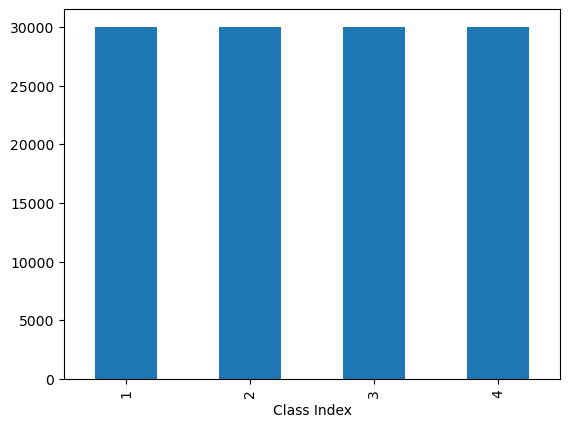

In [34]:
train_set.groupby('Class Index').Description.count().plot.bar(ylim=0)

## White space 

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Definisci un trasformatore personalizzato
class ListToStringTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        # Converte una lista di token in una stringa
        return [' '.join(x) for x in X]

    def fit(self, X, y=None, **fit_params):
        return self

# Crea una pipeline che utilizza il trasformatore
pipeline = Pipeline([
    ('list_to_string', ListToStringTransformer())
])

# Supponiamo che la colonna 'TextW' contenga liste di token
train_set['Textw'] = pipeline.fit_transform(train_set['TextW'])
test_set['Textw'] = pipeline.fit_transform(test_set['TextW'])

# Visualizza le prime righe per vedere il risultato
train_set['Textw'].head()
test_set['Textw'] = pipeline.fit_transform(test_set['TextW'])


In [ ]:
text = dataset['Textw']
category = dataset['Class Index']

In [ ]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['Textw'],train_set['Class Index'])

test_predict = nb.predict(test_set['Textw'])

train_accuracy = round(nb.score(train_set['Textw'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, train_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))


## Decision tree 

In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['Textw'],train_set['Class Index'])

test_predict = dt.predict(test_set['Textw'])

train_accuracy = round(dt.score(train_set['Textw'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## Random forest 

In [ ]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['Textw'],train_set['Class Index'])

test_predict = rfc.predict(test_set['Textw'])

train_accuracy = round(rfc.score(train_set['Textw'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))

## BPE 

### Test_set 

In [35]:
clean_func = clean_text('Description')
train_set['cleaned_text'] = train_set['Description'].apply(clean_func)
train_set.head()

,Class Index,Title,Description,cleaned_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters short sellers wall street dwindling ba...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soaring crude prices plus worries econ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halted oil export flows ma...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil prices toppling records...


In [37]:
#Addestro tokenizzatore
corpus = train_set['Title']

vocab_size = 1000

bpe_pipeline = BPEPipeline(vocab_size)
bpe_pipeline.fit(corpus)

In [38]:
train_set['Text_BPE'] = apply_bpe_to_series(train_set['cleaned_text'])
train_set['Text_BPE'].head()

0    [re, uters, Ġsh, ort, Ġs, ell, ers, Ġw, all, Ġ...
1    [re, uters, Ġp, riv, ate, Ġin, vest, ment, Ġf,...
2    [re, uters, Ġs, o, ar, ing, Ġcr, ud, e, Ġprice...
3    [re, uters, Ġa, ut, h, or, it, ies, Ġh, al, t,...
4    [af, p, Ġt, ear, aw, ay, Ġw, orld, Ġoil, Ġpric...
Name: Text_BPE, dtype: object

### Train_set 

In [39]:
test_set['cleaned_text'] = test_set['Description'].apply(clean_func)
test_set.head()

,Class Index,Title,Description,cleaned_text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,unions representing workers turner newall say ...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",space com toronto canada second team rocketeer...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,ap company founded chemistry researcher univer...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,ap barely dawn mike fitzpatrick starts shift b...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,ap southern california smog fighting agency we...


In [51]:
test_set['Text_BPE'] = apply_bpe_to_series(test_set['cleaned_text'])
test_set['Text_BPE'].head()

KeyboardInterrupt: 

In [52]:
# Per questioni di comodità si importano i dataset con la tokenizzazione bpe già effettuata
train_set = pd.read_csv('train_set_bpe.csv')
test_set = pd.read_csv('test_set_bpe.csv')
train_set.head()

,Class Index,Title,Description,cleaned_text,Text_BPE
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters short sellers wall street dwindling ba...,"['re', 'uters', 'Ġsh', 'ort', 'Ġs', 'ell', 'er..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...,"['re', 'uters', 'Ġp', 'riv', 'ate', 'Ġin', 've..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soaring crude prices plus worries econ...,"['re', 'uters', 'Ġs', 'o', 'ar', 'ing', 'Ġcr',..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halted oil export flows ma...,"['re', 'uters', 'Ġa', 'ut', 'h', 'or', 'it', '..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil prices toppling records...,"['af', 'p', 'Ġt', 'ear', 'aw', 'ay', 'Ġw', 'or..."


In [58]:
train_set['Text_BPE'] = train_set['Text_BPE'].apply(lambda x: ' '.join(x))

In [50]:
test_set['Text_BPE'] = test_set['Text_BPE'].apply(lambda x: ' '.join(x))

KeyError: 'Text_BPE'

In [57]:
# Funzione per pulire ogni elemento della lista e poi unirli
def clean_and_join(lst):
    # Rimuove spazi extra e virgolette, e poi unisce gli elementi
    return ' '.join(item.strip(" '[],") for item in lst)

# Applica la funzione al DataFrame
train_set['Text_BPE'] = train_set['Text_BPE'].apply(clean_and_join)

# Stampa la colonna Text_BPE della prima riga per verificare
print(train_set['Text_BPE'].iloc[0])


     r   e            u   t   e   r   s            Ġ   s   h            o   r   t            Ġ   s            e   l   l            e   r   s            Ġ   w            a   l   l            Ġ   s   t            r   e            e   t            Ġ   d            w            i   n   d            l   i   n   g            Ġ   b            a   n   d            Ġ            u   l   t            r   a            Ġ   c            y            n            i   c   s            Ġ   s            e   e            i   n   g            Ġ   g            r   e            e   n     


In [59]:
train_set.head()

,Class Index,Title,Description,cleaned_text,Text_BPE
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",reuters short sellers wall street dwindling ba...,r e u ...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,reuters private investment firm carlyle group ...,r e u ...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,reuters soaring crude prices plus worries econ...,r e u ...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,reuters authorities halted oil export flows ma...,r e u ...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",afp tearaway world oil prices toppling records...,a f p ...


In [12]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(train_set['Text_BPE'],train_set['Class Index'])

test_predict = nb.predict(test_set['Text_BPE'])

train_accuracy = round(nb.score(train_set['Text_BPE'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Class Index'])*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
# Supponiamo che target_category sia attualmente un array numerico o una lista di numeri
# Convertilo in una lista di stringhe
target_category = [str(name) for name in target_category]

# Ora usa questa lista modificata nel classification_report
print(classification_report(test_predict, test_set['Class Index'], target_names=target_category))


Naive Bayes Train Accuracy Score : 90% 
Naive Bayes Test Accuracy Score  : 89% 

              precision    recall  f1-score   support

           3       0.88      0.91      0.90      1855
           4       0.97      0.93      0.95      1974
           2       0.83      0.86      0.85      1831
           1       0.87      0.85      0.86      1940

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



## Decision tree

In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(train_set['Text_BPE'],train_set['Class Index'])

test_predict = dt.predict(test_set['Text_BPE'])

train_accuracy = round(dt.score(train_set['Text_BPE'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Text_BPE'], target_names=target_category))

## Random forest

In [ ]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(train_set['Text_BPE'],train_set['Class Index'])

test_predict = rfc.predict(test_set['Text_BPE'])

train_accuracy = round(rfc.score(train_set['Text_BPE'],train_set['Class Index'])*100)
test_accuracy =round(accuracy_score(test_predict, test_set['Text_BPE'])*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, test_set['Text_BPE'], target_names=target_category))

# Morfessor 